# Trees and Ensembles

In [8]:
# Global imports and settings
from preamble import *
%matplotlib inline
#%load_ext autoreload
%autoreload 2
plt.rcParams['savefig.dpi'] = 120 # Use 300 for PDF, 100 for slides
# InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Trees

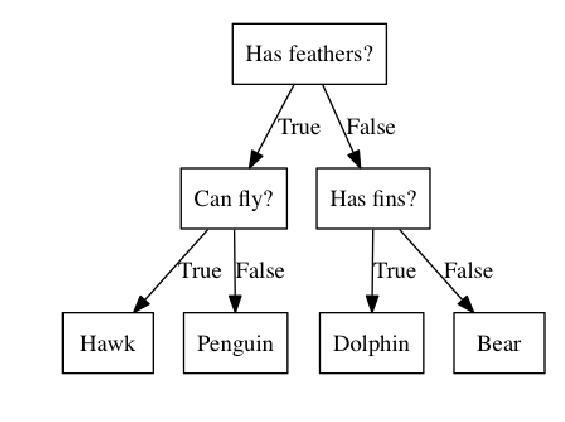

In [20]:
mglearn.plots.plot_animal_tree()

#### Building Decision Trees
* Split the data in two (or more) parts
* Search over all possible splits and choose the one that is most _informative_
    * Many heuristics
    * E.g. _information gain_: how much does the entropy of the class labels decrease after the split (purer 'leafs')
    * See book chapter 4
* Repeat with recursive partitioning

Making predictions:
    
* Classification: find leaf for new data point, predict majority class (or class distribution)
* Regression: idem, but predict the _mean_ of all values    

#### Decision Tree classification

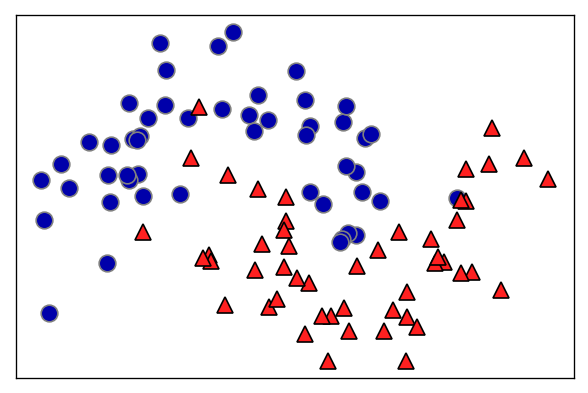

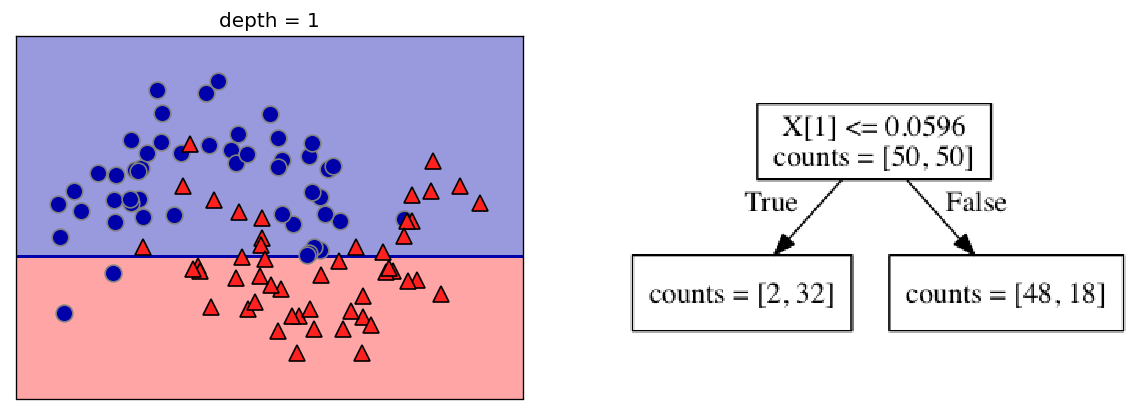

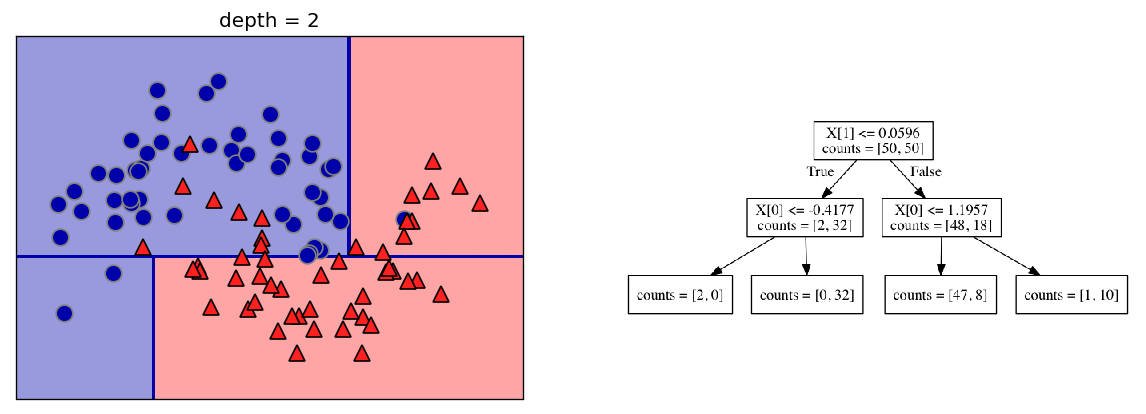

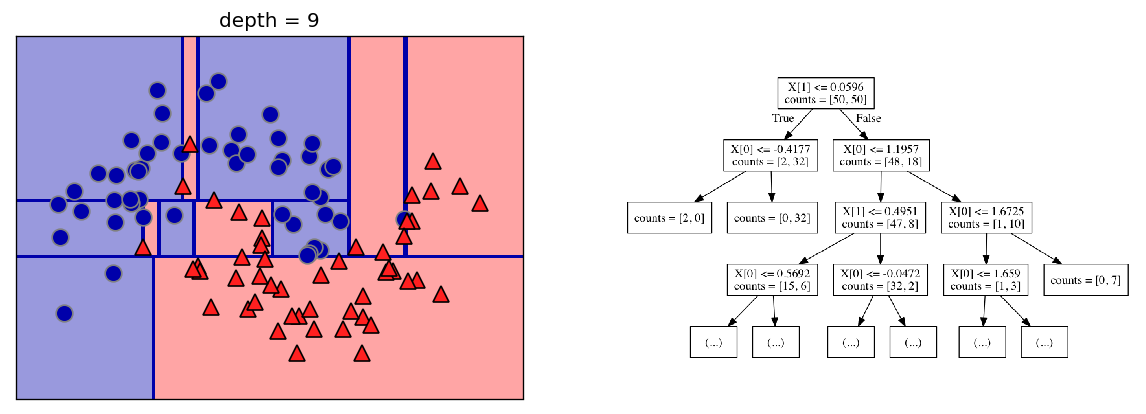

In [21]:
mglearn.plots.plot_tree_progressive()

### Heuristics

For classification ($X_i \rightarrow {class}_{k}$): *Impurity measures*:

- Misclassification Error (leads to larger trees):
$$ 1 - \underset{k}{\operatorname{argmax}} \hat{p}_{k} $$

- Gini-Index (probabilistic predictions):
$$ \sum_{k\neq k'} \hat{p}_k \hat{p}_{k'} = \sum_{k=1}^K \hat{p}_k(1-\hat{p}_k) $$

with $\hat{p}_k$ = the relative frequency of class $k$ in the leaf node

- Entropy (of the class attribute) measures *unpredictability* of the data:
    - How likely will random example have class k?
$$ E(X) = -\sum_{k=1}^K \hat{p}_k \log_{2}\hat{p}_k $$

- Information Gain (a.k.a. Kullback–Leibler divergence) for choosing attribute $X_i$ to split the data:
$$ G(X,X_i) = E(X) - \sum_{v=1}^V \frac{|X_{i=v}|}{|X_{i}|} E(X_{i=v}) $$

with $\hat{p}_k$ = the relative frequency of class $k$ in the leaf node,  $X$ = the training set, containing $i$ features (variables) $X_i$, $v$ a specific value for $X_i$, $X_{i=v}$ is the set of examples having value $v$ for feature $X_i$: $\{x \in X | X_i = v\}$

Heuristics visualized (binary class)
- Note that `gini != entropy/2`

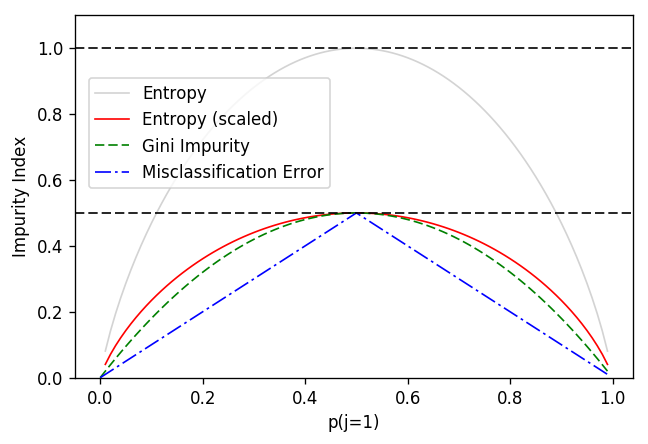

In [22]:
ml.plots.plot_heuristics()

### Example

Ex.| 1 | 2 | 3 | 4 | 5 | 6
---|---|---|---|---|---|---
a1 | T | T | T | F | F | F
a2 | T | T | F | F | T | T
class | + | + | - | + | - | -

$E(X)$ ?  
$G(X, X_{a2})$ ?  
$G(X, X_{a1})$ ?

$E(X)$ = $-(\frac{1}{2}*log_2(\frac{1}{2})+\frac{1}{2}*log_2(\frac{1}{2})) = 1$ (classes have equal probabilities)    
$G(X, X_{a2})$ = 0 (after split, classes still have equal probabilities, entropy stays 1)

Ex.| 1 | 2 | 3 | 4 | 5 | 6
---|---|---|---|---|---|---
a1 | T | T | T | F | F | F
a2 | T | T | F | F | T | T
class | + | + | - | + | - | -

$$ E(X) = -\sum_{k=1}^K \hat{p}_k \log\hat{p}_k \quad , \quad G(X,X_i) = E(X) - \sum_{v=1}^V \frac{|X_{i=v}|}{|X_{i}|} E(X_{i=v}) $$

$$E(X_{a1=T}) = - \frac{2}{3} \log_{2}(\frac{2}{3}) - \frac{1}{3} \log_{2}(\frac{1}{3}) = 0.9183 \quad (= E(X_{a1=F}))$$
$$G(X, X_{a1}) = 1 - \frac{1}{2} 0.9183 - \frac{1}{2} 0.9183 = 0.0817 $$

hence we split on a1

### Handling many-valued features
What happens when a feature has (almost) as many values as examples?
- Information Gain will select it

One approach: use Gain Ratio instead (not available scikit-learn):
$$ GainRatio(X,X_i) = \frac{Gain(X,X_i)}{SplitInfo(X,X_i)}$$  
$$ SplitInfo(X,X_i) = - \sum_{v=1}^V \frac{|X_{i=v}|}{|X|} log_{2} \frac{|X_{i=v}|}{|X|} $$

where $X_{i=v}$ is the subset of examples for which feature $X_i$ has value v.

SplitInfo will be big if $X_i$ fragments the data into many small subsets, resulting in a smaller Gain Ratio. 

### Overfitting: Controlling complexity of Decision Trees
Decision trees can very easily overfit the data. Regularization strategies:  

* Pre-pruning: stop creation of new leafs at some point
    * Limiting the depth of the tree, or the number of leafs
    * Requiring a minimal leaf size (number of instances)
    * Confidence factor (C): minimal information gain necessary to make the split (or prune the leaf)
        * In WEKA, this is used for pruning
* Post-pruning: build full tree, then prune (join) leafs
    * Reduced error pruning (REPTree): evaluate against held-out data
        * Only split if performance on held out data improves
    * Many other strategies exist. 

Effect of parameters and pre-pruning: 
* J48: try different values for:
    - confidenceFactor
    - minNumObjects
    - reduced error pruning: true/flase
* REPTree:
    - also has maximum tree depth

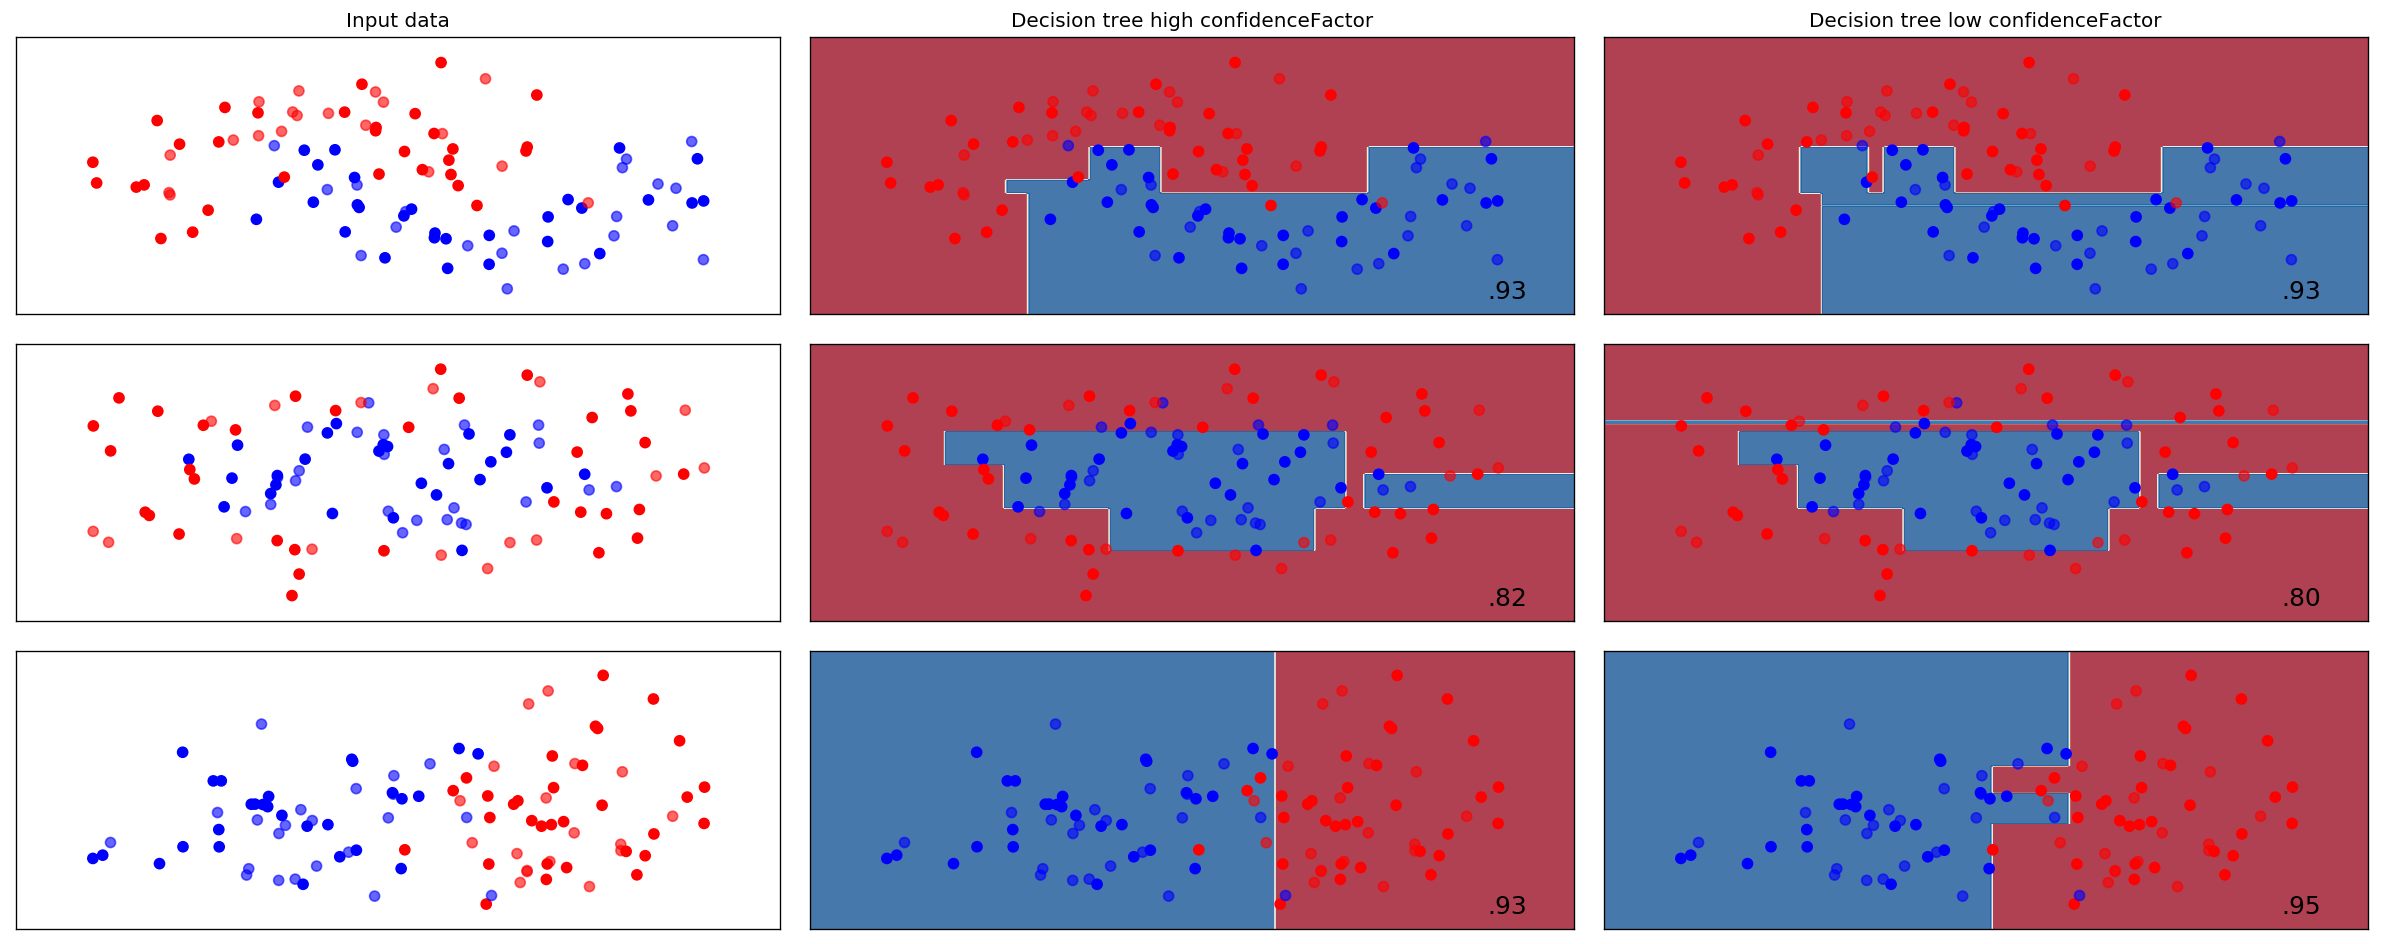

In [23]:
names = ["Decision tree high confidenceFactor", "Decision tree low confidenceFactor"]
classifiers = [sk.tree.DecisionTreeClassifier(criterion="entropy", min_impurity_split=0.5), 
               sk.tree.DecisionTreeClassifier(criterion="entropy", min_impurity_split=0.00000000000001)]

ml.plots.plot_classifiers(names, classifiers, figuresize=(20,8))

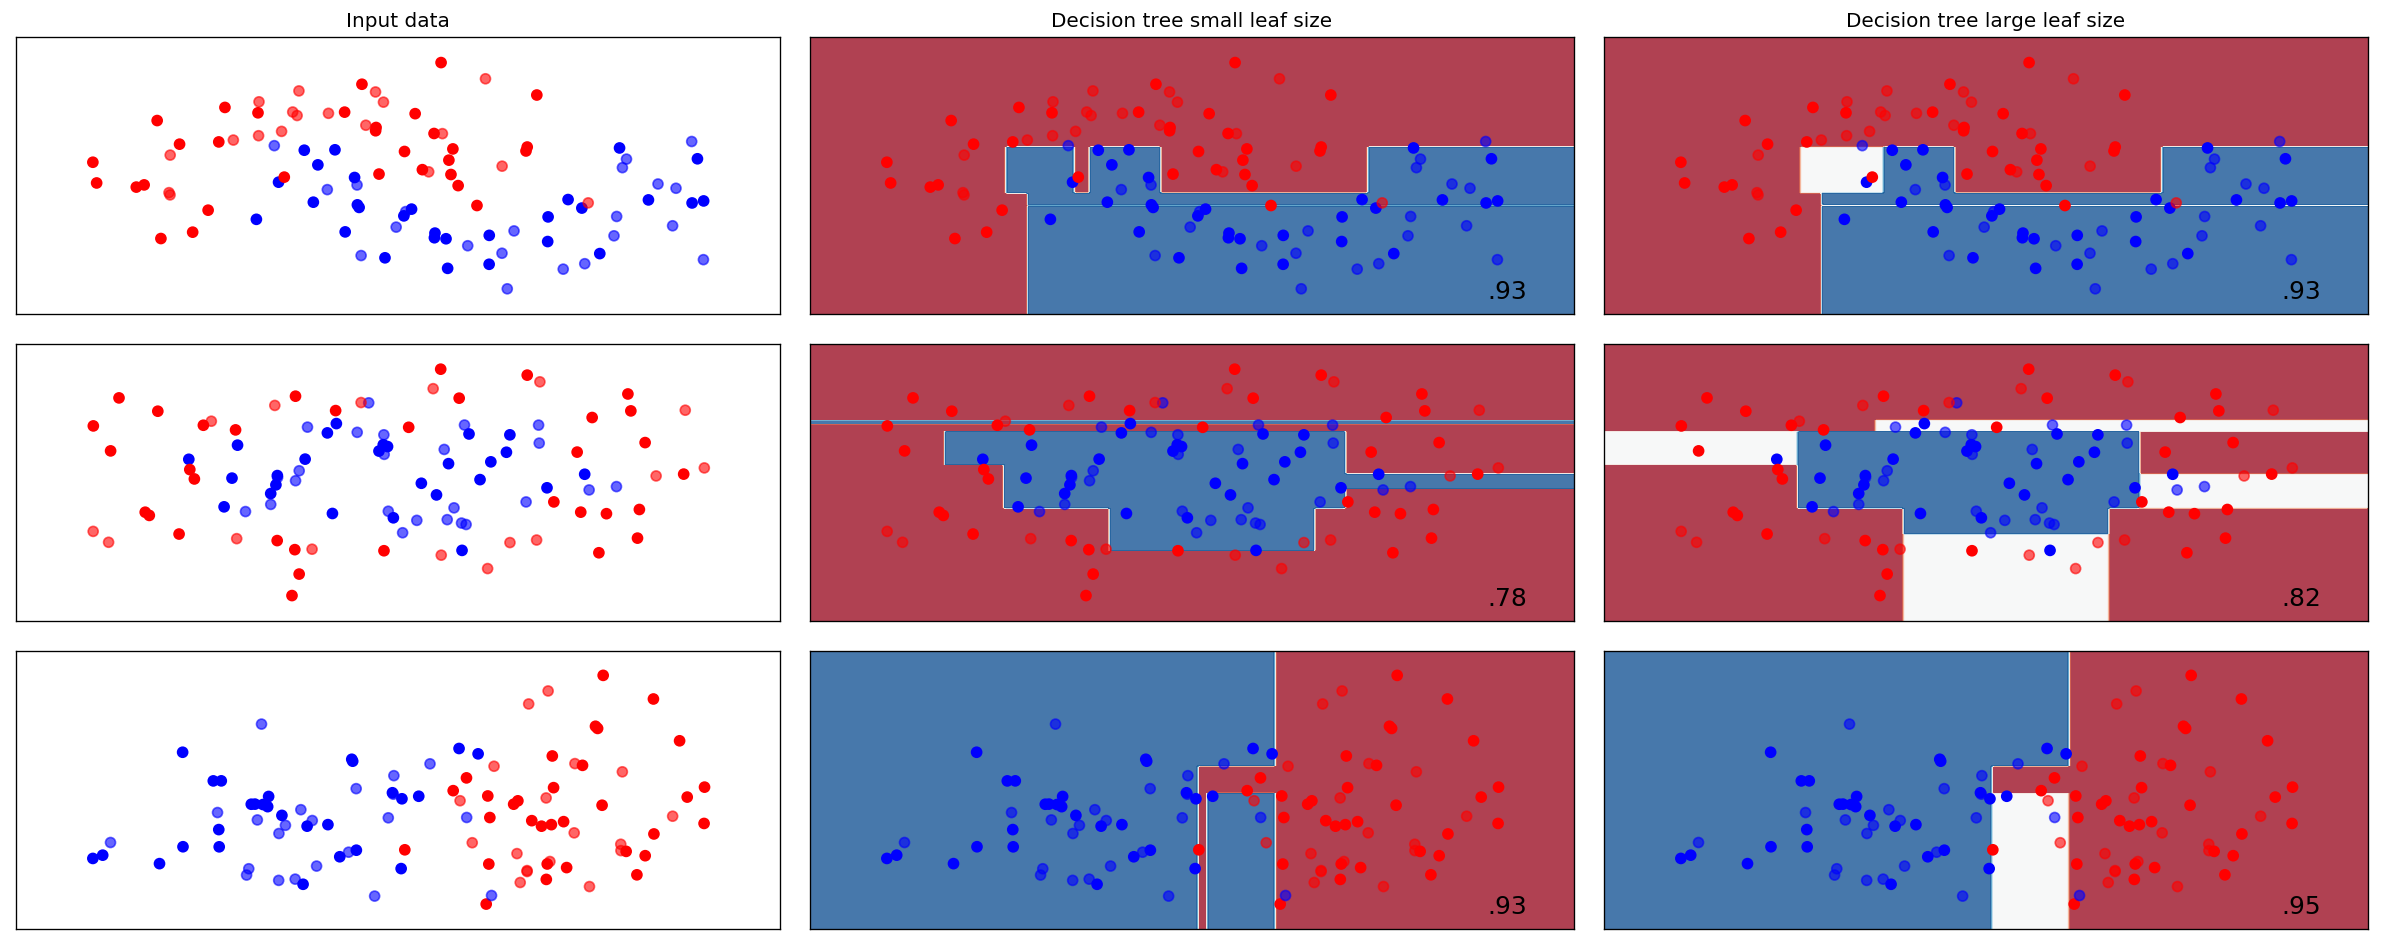

In [68]:
names = ["Decision tree small leaf size", "Decision tree large leaf size"]
classifiers = [sk.tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1), 
               sk.tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=2)]

ml.plots.plot_classifiers(names, classifiers, figuresize=(20,8))

Analyzing Decision Trees manually

- Visualize and find the path that most data takes

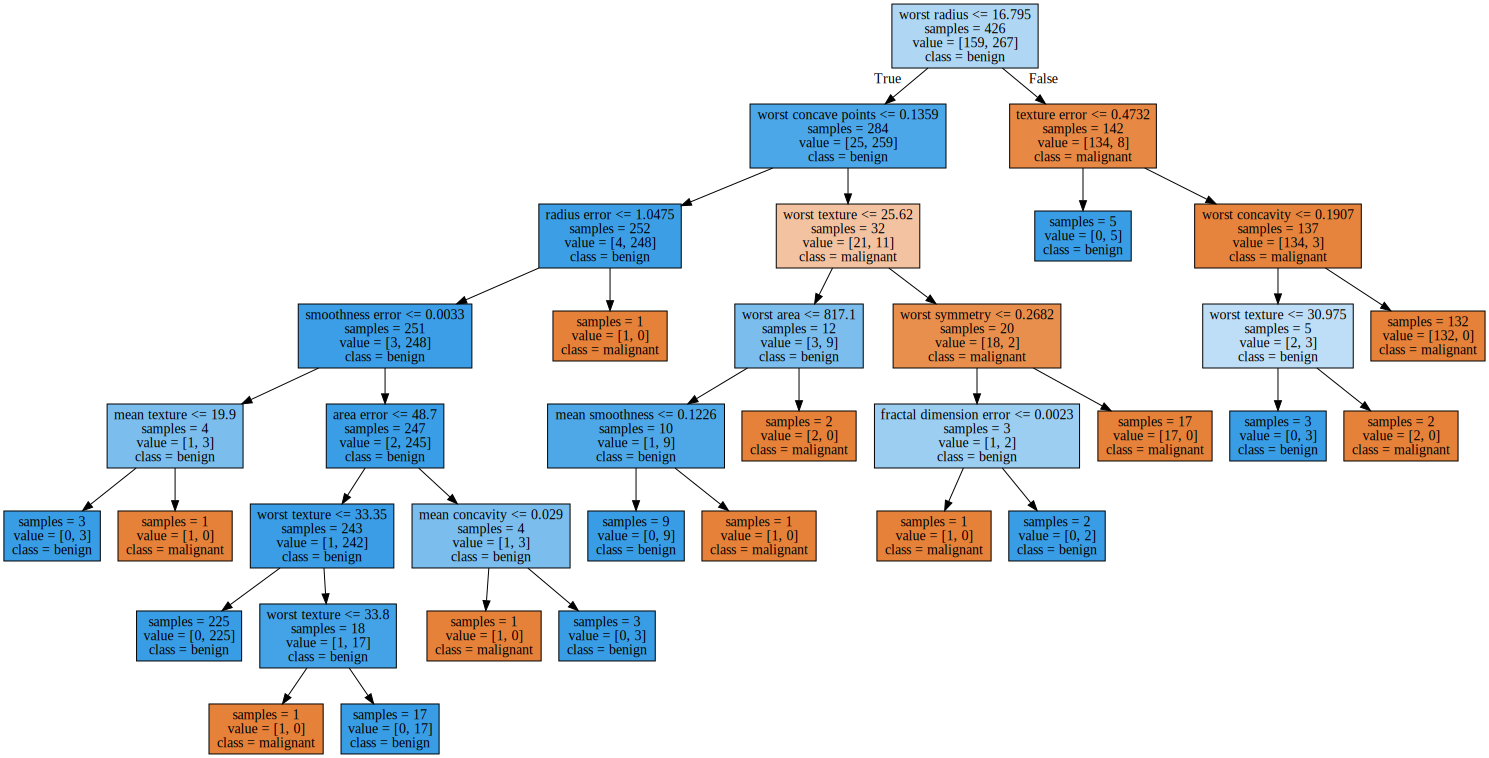

In [69]:
from sklearn.datasets import load_iris, load_breast_cancer
#ml.plots.plot_tree(load_iris(), class_names=["Setosa", "Versicolour", "Virginica"])
ml.plots.plot_tree(load_breast_cancer(), class_names=["malignant", "benign"])

### Decision tree regression
Heuristic for regression ($x_i \rightarrow y_i \in {\rm I\!R}$): *Minimal quadratic distance*

- Consider splits at every data point for every variable (or halfway between data points)
- Dividing the data on split variable $X_j$ at splitpoint $s$ leads to the following half-spaces:

$$ R_1(j, s) = { X : X_j \leq s} \quad and \quad R_2(j, s) = { X : X_j > s} $$
    
- The best split variable and the corresponding splitpoint, with predicted value $c_i$ and actual value $Y_i$:

$$ \min_{j,s} \left(\min_{c_1} \sum_{x_{i} \in R_1(j,s)} (y_i - c_1)^2 + \min_{c_2} \sum_{x_{i} \in R_2(j,s)} (y_i - c_2)^2 \right) $$

- Assuming that the tree predicts $y_i$ as the average of all $x_i$ in the leaf:
    
$$ \hat{c}_1 = \text{avg}(y_i | x_{i} \in R_1(j,s)) \quad and \quad \hat{c}_2 = \text{avg}(y_i | x_{i} \in R_2(j,s)) $$

with $x_i$ being the i-th example in the data, with target value $y_i$

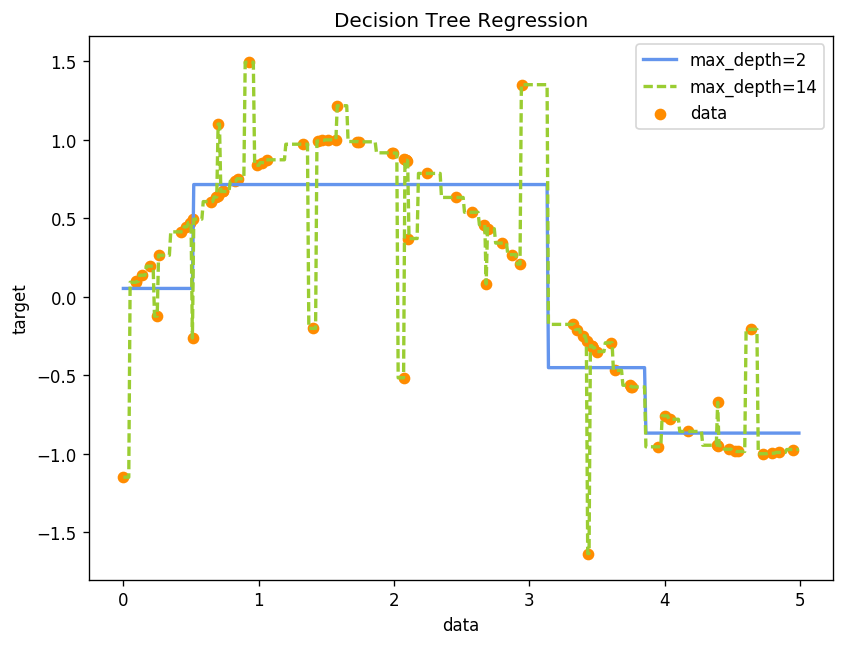

In [72]:
ml.plots.plot_regression_tree(2,14)

## Predicting probabilities
Decision trees can easily predict probabilities or confidence bounds.

* Classification: return the _ratio_ of classes as the probability
    - A leaf with 75% positives, 25% negatives will predict positive with a confidence of 75% for all instances in that leaf
    - This can also be used to _rank_ multiple classes
* Regression: use the mean $\mu$ and standard deviation $\sigma$ to return a confidence interval
    - Return a probability corresponding to the normal distribution
    $$p(x) = \frac{1}{(\sigma\sqrt{2 \pi})} e^{-(\frac{(x - \mu)^2}{2 \sigma^2})}$$

Note that decision trees do not extrapolate well. 

- The leafs return the same _mean_ value no matter how far the new data point lies from the training examples.
- Example on the `ram_price` forecasting dataset

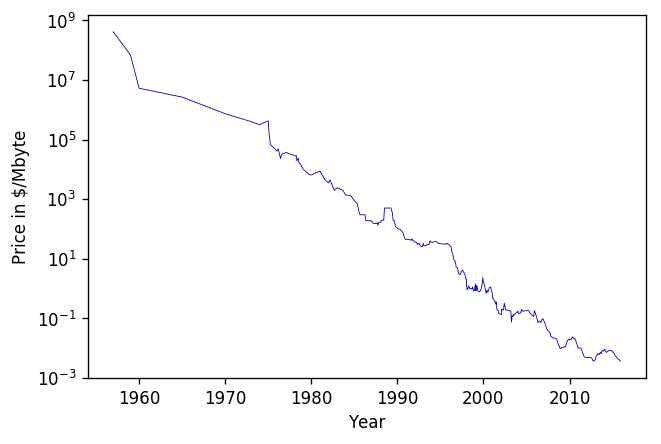

In [46]:
ram_prices = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

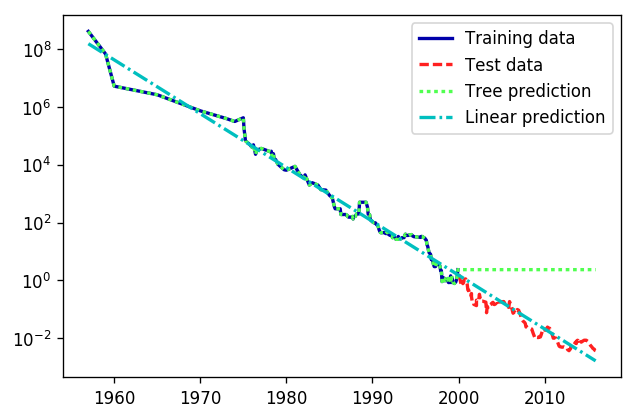

In [60]:
ml.plots.plot_tree_extrapolate(ram_prices)

#### Strengths, weaknesses and parameters
Pre-pruning: regularize by:

* Setting a low `max_depth`, `max_leaf_nodes`
* Setting a higher `min_samples_leaf` (default=1)

Decision trees: 

* Work well with features on completely different scales, or a mix of binary and continuous features
    * Does not require normalization
* Interpretable, easily visualized
* Still tend to overfit easily. Use ensembles of trees.

## Model trees

* There are better ways to use the samples in each leaf than just taking the mean (for regression)
* A _model tree_ (e.g. `weka.tree.LMT`) learns a simple regression model (e.g. a linear model) for all the points in each leaf
* To predict, use the predictions of the corresponding model
* A _smoothing process_ is often used to avoid sharp discontinuities between neighboring leafs
    - Learn a linear model for each internal node, as well as for the leaves.
    - Each leaf prediction is filtered along the path back to the root
    - At each node, the prediction is smoothed by combining it with the node prediction
    - Substantially increases the accuracy of predictions.
* Smoothing function:
    - With leaf (or lower node) prediction p, node prediction q, node size n, smooting constant k

$$ p = \frac{np+kq}{n+k}$$


# Ensemble learning
Also see Chapter 12

Ensembles are methods that combine multiple machine learning models to create more powerful models. There are three main approaches:

* __Bagging__ (Bootstrap Aggregating): Build randomized trees on random samples (bootstraps) of the data
* __Boosting__: Build trees iteratively, giving higher weights to the points misclassified by previous trees
* __Stacking__: Train a (meta)model that learns how to combine the predictions of multiple other models

Often yield much better models, although interpretability is lost.

## Bias-Variance decomposition

- To understand why ensembles work, we need to take a closer look at the types of errors learners make
- When we evaluate learners multiple times on different samples, we can distinguish:
    - Bias: systematic error (independent of the training sample). The classifier always gets certain points wrong
    - Variance: error due to variability of the model with respect to the training sample. The classifier predicts some points accurately on some training sets, but inaccurately on others.
- There is also an intrinsic (noise) error, but there's nothing we can do against that.
- Bias is associated with underfitting, and variance with overfitting
- Bias-variance trade-off: you can often exchange bias for variance through (de)regularization
    - Make models simpler or more complex (e.g. smaller/larger trees)
    - The challenge is to find the right trade-off (minimizing total error)
- Useful to understand how to tune or adapt learning algorithm

![Bias-variance](./images/07_bias_variance.png)

### Measuring bias/variance (regression)
- Take 100 or more bootstraps
- For each data point x we'll have multiple predictions
    - $bias(x) = (x_{true} - mean(x_{predicted}))^2$
    - $variance(x) = var(x_{predicted})$
- Total bias: $\sum_{x} bias(x) * w_x$, with $w_x$ the ratio of x occuring in the test set
    - if x appears in 33% of the test sets, $w_x=0.33$
- Total variance: $\sum_{x} variance(x) * w_x$

### Measuring bias/variance (binary classification)
- Take 100 or more bootstraps
- Bias for any point x = misclassification ratio
    - If misclassified 50% of the time: $bias(x)=0.5$
- Variance for any point x is $(1 - (P(class_1)^2 + P(class_2)^2))/2$
    - $P(class_i)$ is ratio of class $i$ predictions
    - When each class predicted half of the time: $variance(x) = (1-(0.5^2+0.5^2))/2 = 0.25$
- Total bias: $\sum_{x} bias(x)^2 * w_x$, with $w_x$ the ratio of x occuring in the test data
- Total variance: $\sum_{x} variance(x) * w_x$

## Ensembles and bias-variance errors
* Bagging is a _variance reduction technique_
    - Start with high variance learners (e.g. large trees)
    - Reduce variance by building many such models and averaging out errors
    - The more varied the models are, the bigger the variance reduction effect
* Boosting is a _bias reduction technique_
    - Start with high bias learners (e.g. very small trees)
    - Reduce bias by building many such learners, each focussing on specific parts of the data
    - Build new models for parts of your data that are not modelled well yet

Variance and bias for RandomForests with increasing numbers of iterations (trees)

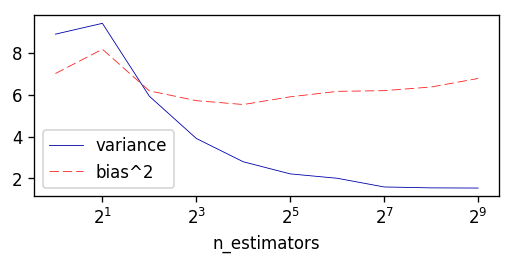

In [9]:
ml.plots.plot_bias_variance_random_forest()

### Bagging
Reduce overfitting by averaging out individual predictions (variance reduction)

* WEKA: `meta.Bagging`
    * Has a base-classifier,  e.g. `REPTree` or `J48`
* Take _bootstrap samples_ of your data
    * Randomly sample with replacement
    * Build a tree on each bootstrap
* Repeat `numIterations` times 
    * Higher values: more trees, more smoothing
    * Make prediction by aggregating the individual tree predictions

Aggregating predictions:
* Classification: soft voting
    * Every member returns probability for each class
    * After averaging, the class with highest probability wins
* Regression:  
    * Return the _mean_ of all predictions

### RandomForests
Create additional diversity between the trees through _randomization_ 

* Almost any learner can be randomized in some way
* Randomize trees by considering only a random subset of features (_random subspace_) of size `numFeatures` _in each node_
    * Small `numFeatures` yields more different trees, more smoothing
    * Recommended defaults: $sqrt(n\_features)$ for classification, $log2(n\_features)$ for regression
* WEKA: `tree.RandomForest`. Main paramaters:
    * `numIterations` (higher is better, but diminishing returns)
    * `numFeatures` (default is typically ok)
        * Set smaller to reduce space/time requirements

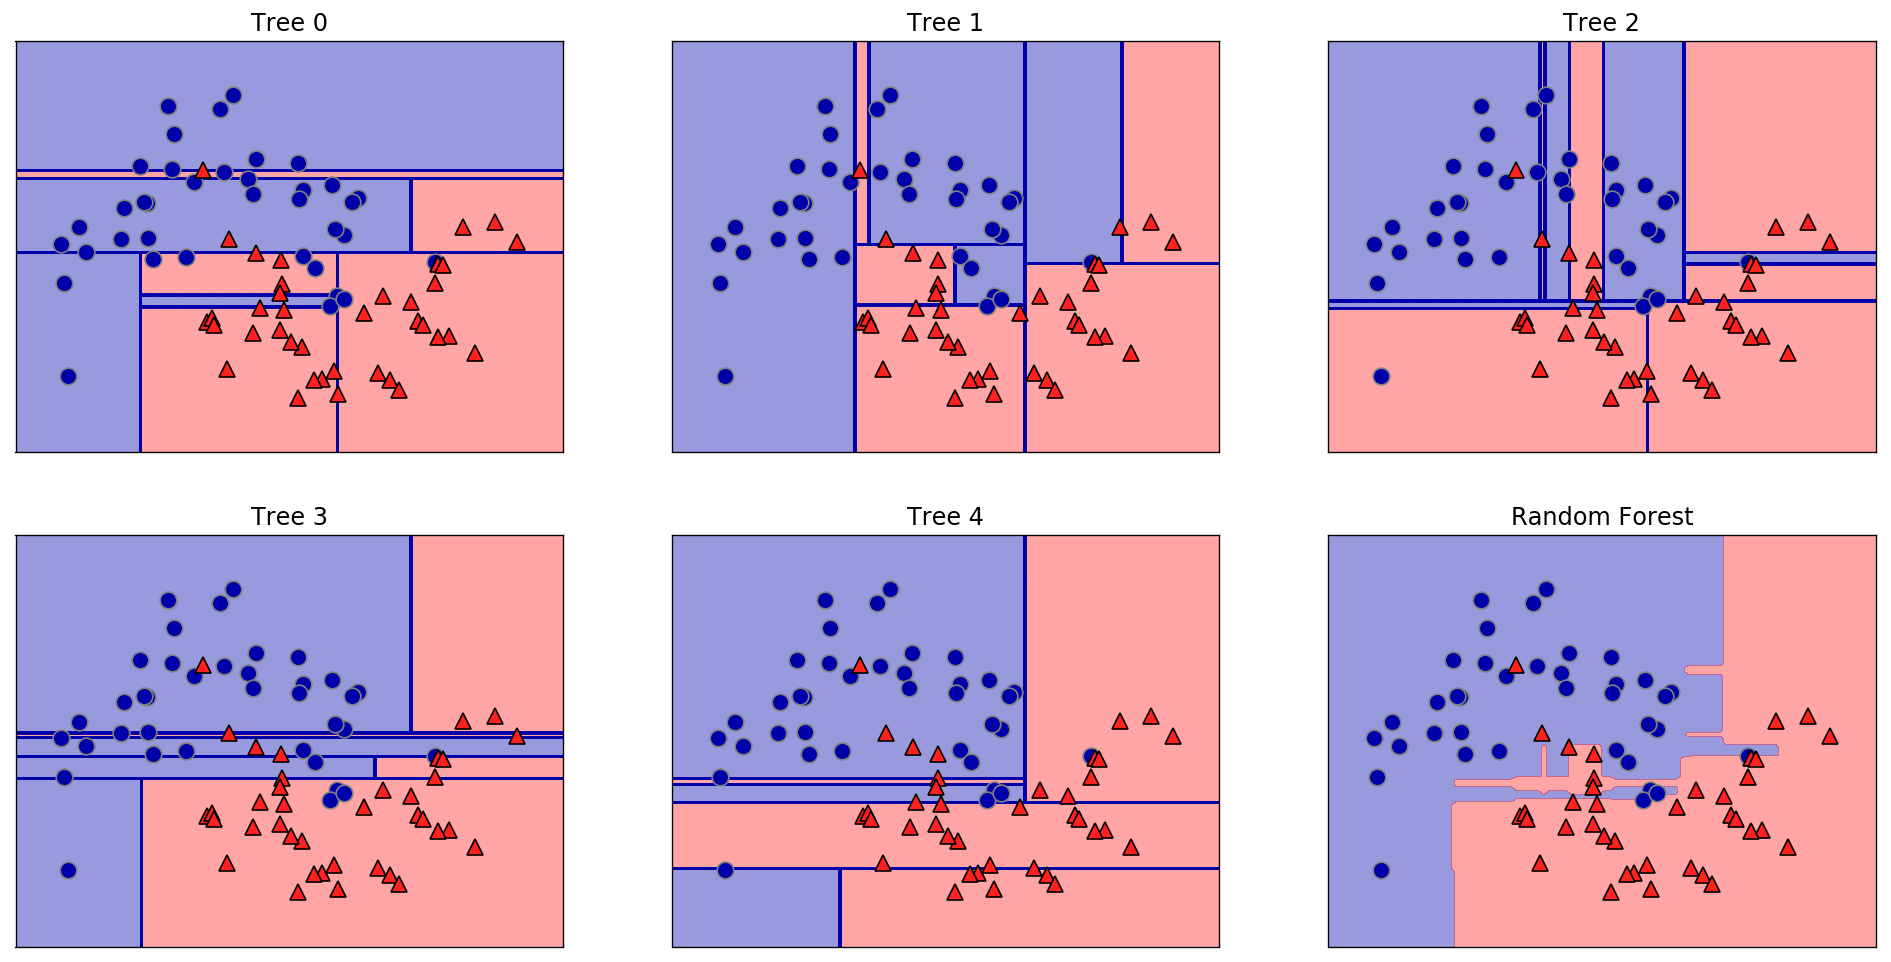

In [56]:
ml.plots.plot_random_forest()

## RotationForests

- Another type of _randomization_
- Each iteration, the input variables are divided into $k$ disjoint subsets
- For each subset, a smaller number of features is generated with PCA
    - Principal Component Analysis: dimensionality reduction technique
- Similar performance as RandomForests with far fewer trees.

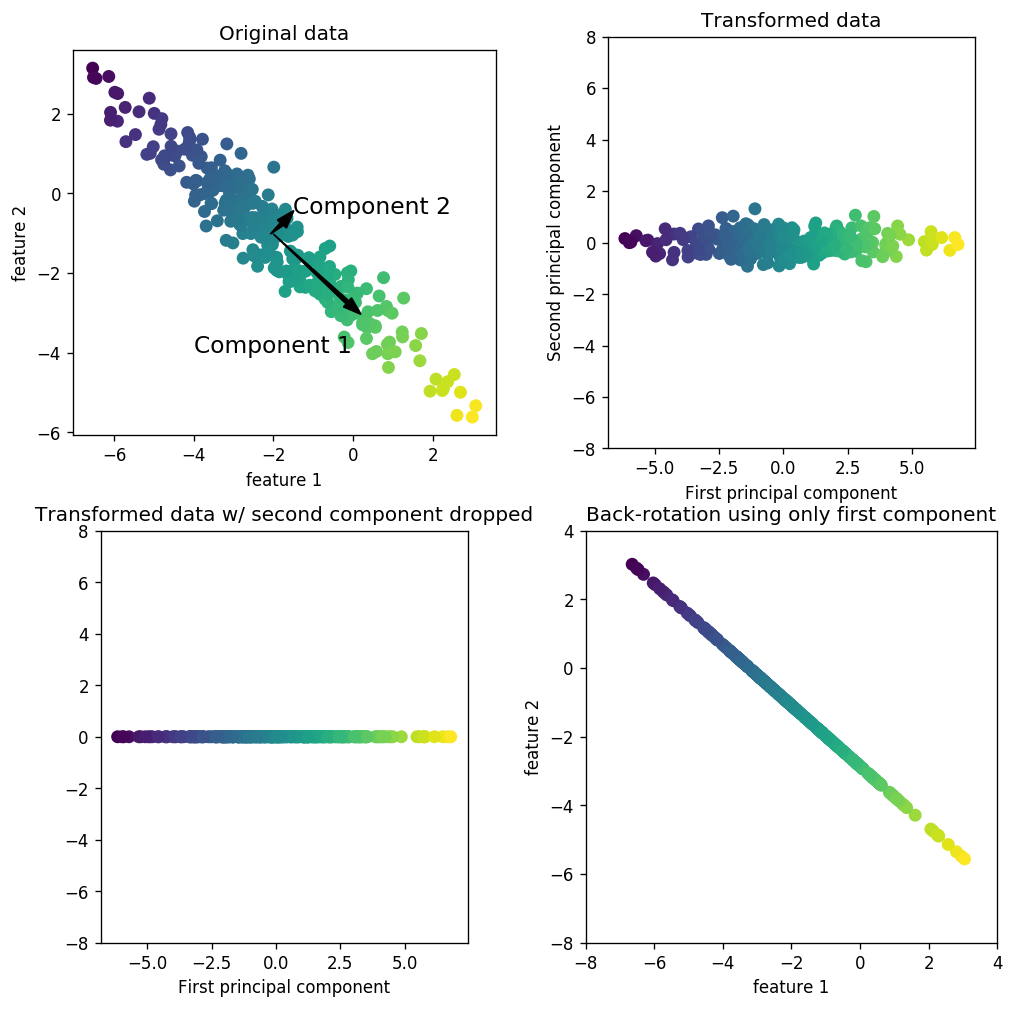

In [11]:
mglearn.plots.plot_pca_illustration()

#### Strengths, weaknesses and parameters
RandomForest are among most widely used algorithms:

* Don't require a lot of tuning
* Typically very accurate models
* Handles heterogeneous features well
* Implictly selects most relevant features

Downsides:

* less interpretable, slower to train (but parallellizable)
* don't work well on high dimensional sparse data (e.g. text)

## Boosting
Instead of reducing the variance of overfitted models, reduce the bias of underfitted models
- Start with high bias learners (e.g. very small trees)
- After building the model, increase the weights of all misclassified points
    - For regression, weight them corresponding to the prediction error.
- Build a new model focussing on data points that are not modelled well yet
- Repeat `numIterations' times

Each tree provides good predictions on part of the data, use voting for final prediction

* Soft voting for classification, mean values for regression

Example:
![boosting](./images/08_boosting_0.png)

After 1 iteration

- The simple decision tree divides space
- Misclassified points get higher weight (larger dots)

![boosting](./images/08_boosting_1.png)

After 3 iterations

![boosting](./images/08_boosting_3.png)

After 20 iterations

![boosting](./images/08_boosting_20.png)

* In WEKA:
    * `meta.AdaBoostM1` (only binary problems)
    * `meta.MultiBoostAB` (in MultiBoostAB extension package)
* Use with very shallow trees
    * Use `DecisionStump` as base-learner
    * Or `REPTree` with small `max_depth` (e.g.<4)
* Repeat `numIterations` times (default 10, best much higher)

### Additive regression
* Additive models: make predictions by summing up the contributions obtained from other models
    - Underlying models should complement each other
* For regression:
    - Build a standard regression model
    - Compute all residuals (errors)
    - Build a second regression model to predict those errors, repeat
    - Predict by summing up all predictions
* Prone to overfitting, use cross-validation to know when to stop

* In WEKA:
    - `meta.LogitBoost`: Additive logistic regression (binary classification)
    - `meta.AdditiveRegression`: also known as _gradient boosting_ (regression only)
        - Typically uses small trees as base-learners

In [ ]:
Comparison

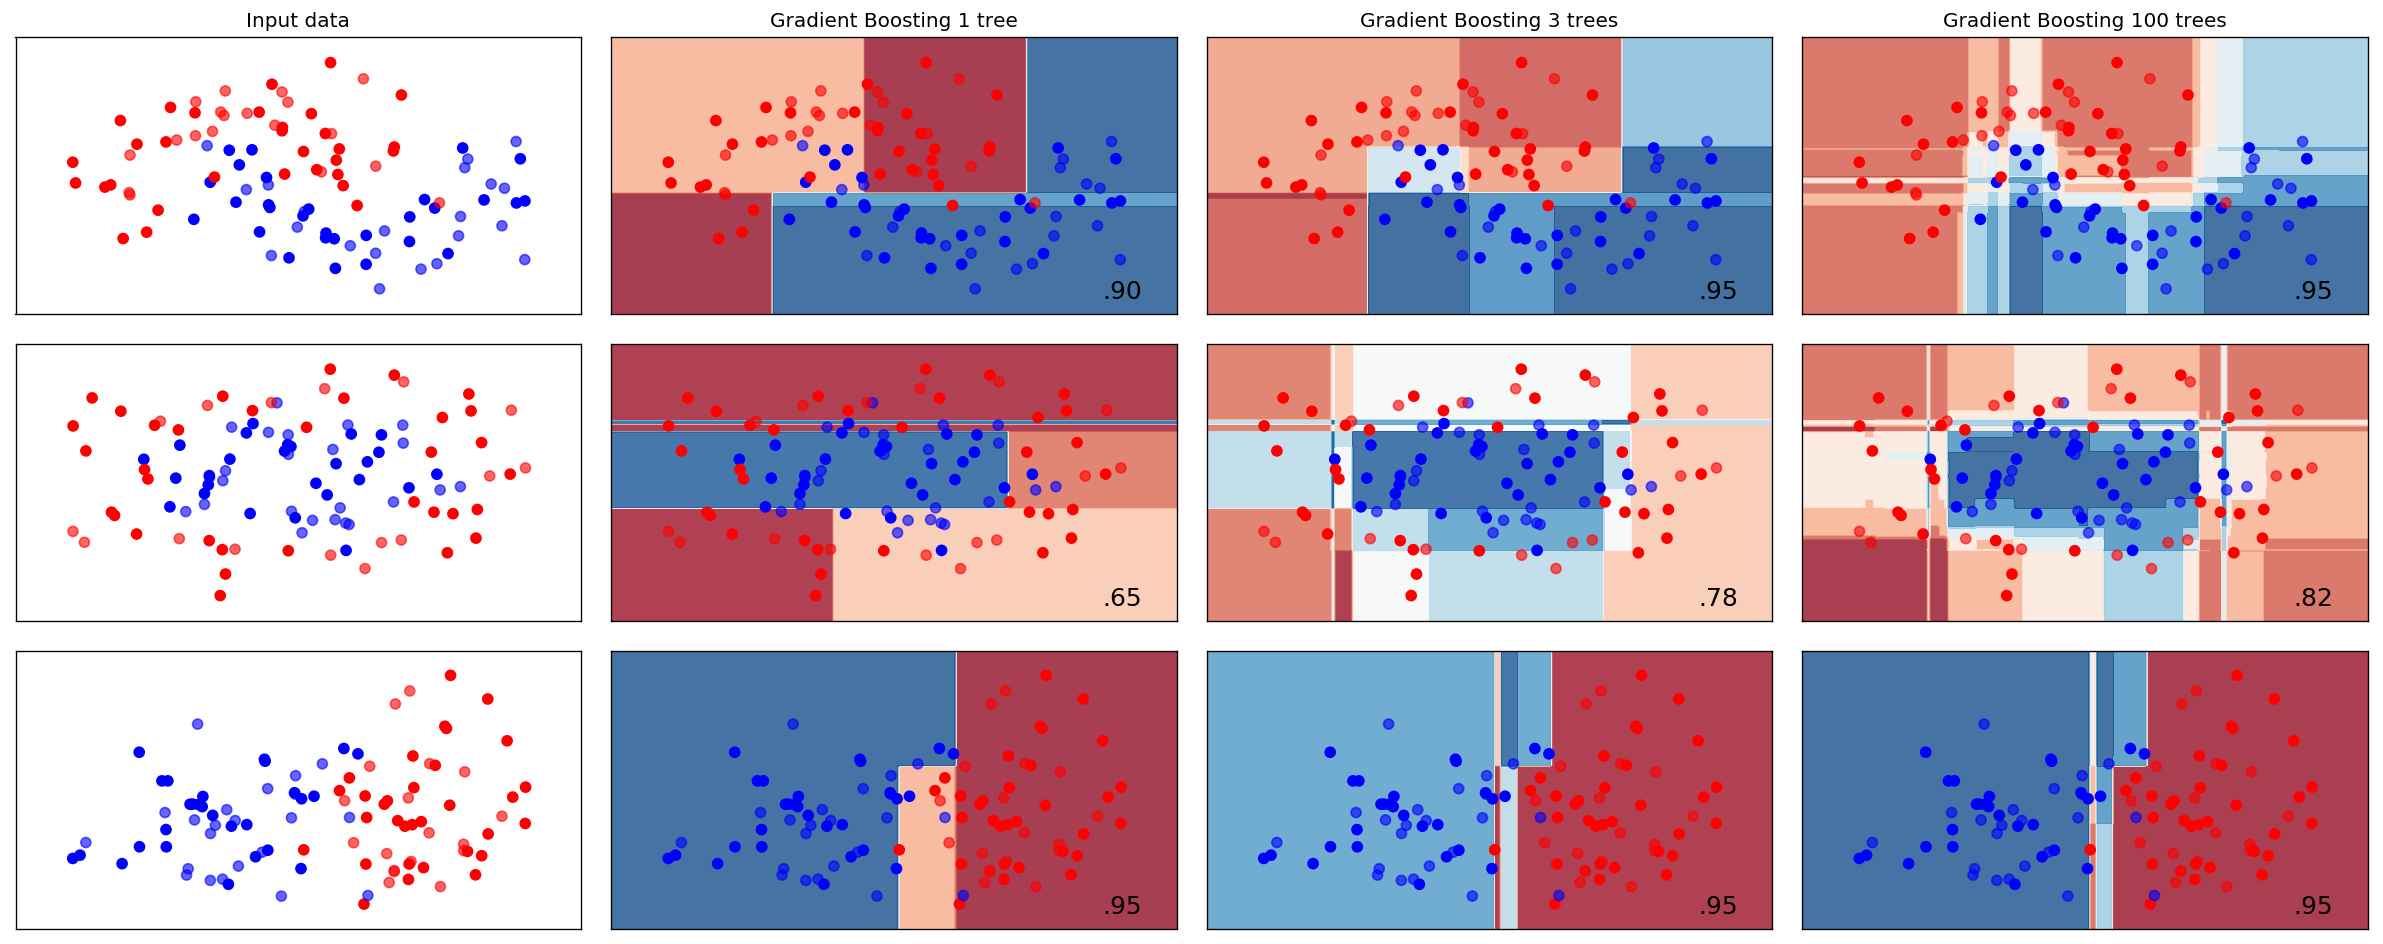

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
names = ["Gradient Boosting 1 tree", "Gradient Boosting 3 trees", "Gradient Boosting 100 trees"]

classifiers = [
    GradientBoostingClassifier(n_estimators=1, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=3, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.5)
    ]

ml.plots.plot_classifiers(names, classifiers, figuresize=(20,8))

##### Strengths, weaknesses and parameters
* Among the most powerful and widely used models
* Work well on heterogeneous features and different scales
* Require careful tuning, take longer to train.
* Does not work well on high-dimensional sparse data

Main hyperparameters:

* `n_estimators`: Higher is better, but will start to overfit at some point
* `learning_rate`: Lower rates mean more trees are needed to get more complex models
    * Set `n_estimators` as high as possible, then tune `learning_rate`
* `max_depth`: typically kept low (<5), reduce when overfitting

Comparison

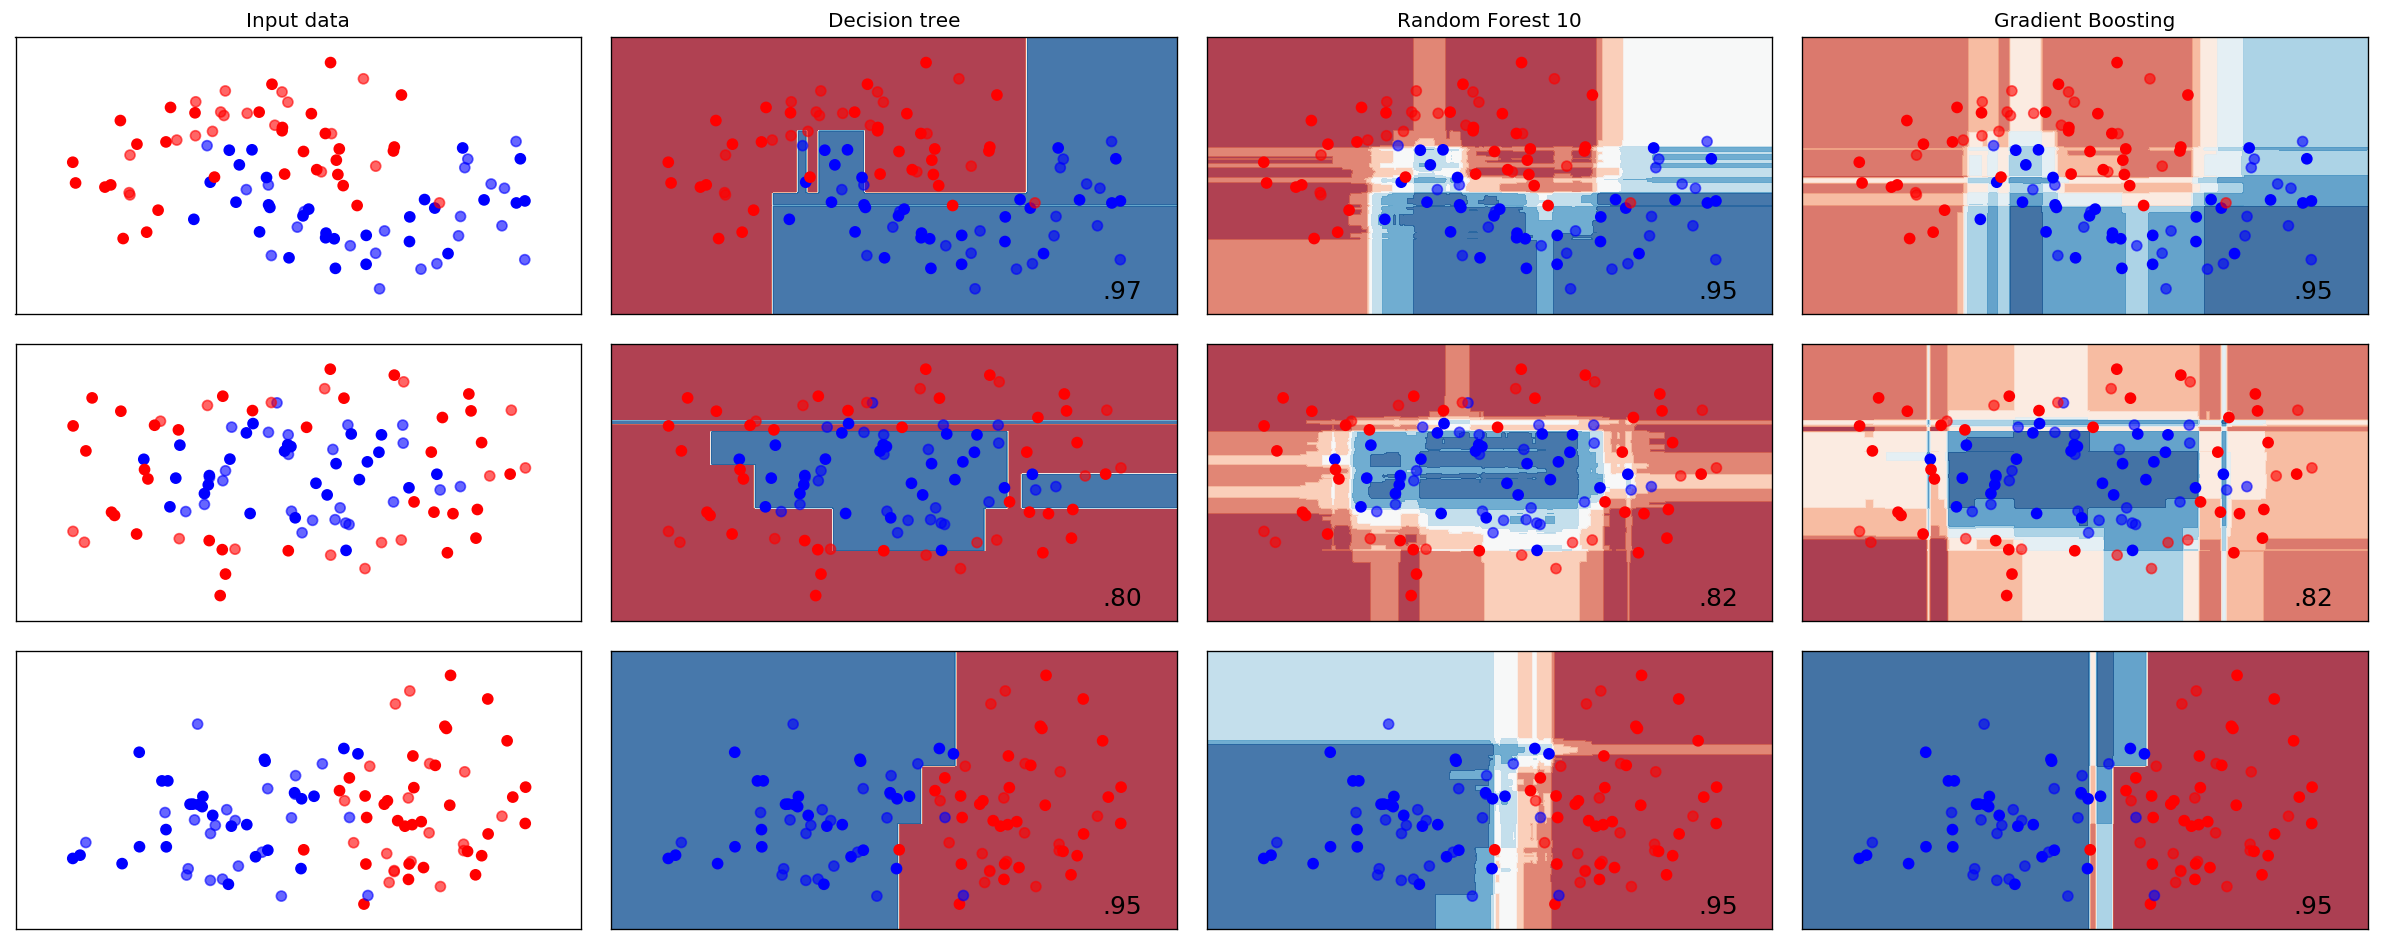

In [66]:
names = ["Decision tree", "Random Forest 10", "Gradient Boosting"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GradientBoostingClassifier(random_state=0, learning_rate=0.5)
    ]

ml.plots.plot_classifiers(names, classifiers, figuresize=(20,8))

### Summary
- Bagging / RandomForest is a variance-reduction technique
    - Build many high-variance (overfitting) models
        - Typically deep (randomized) decision trees
        - The more different the models, the better
    - Aggregation (soft voting or averaging) reduces variance
    - Parallellizes easily
- Boosting is a bias-reduction technique
    - Build many high-bias (underfitting) models
        - Typically shallow decision trees
        - Sample weights are updated to create different trees
    - Aggregation (soft voting or averaging) reduces bias
    - Doesn't parallelize easily
        - Approximation techniques exist to speed up calculation
- You can build ensembles with other models as well
    - Especially if they show high variance or bias
- It is also possible to build _heterogeneous_ ensembles
    - Models from different algorithms
    - Are combined by letting each algorithm predict
    - Often a meta-classifier/regressor is trained on the predictions: Stacking